In [38]:
import keras 
from keras.callbacks import CSVLogger
from tensorflow.keras import models, layers

import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import cifar100


In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [39]:
print('tensor shape')
print('\ttraining images:', train_images.shape)
print('\ttraining labels:', train_labels.shape)
print('\ttraining images:', train_images.dtype)
print('\ttraining labels:', train_labels.dtype)
print('\ttest images:', test_images.shape)
print('\ttest labels:', test_labels.shape)

tensor shape
	training images: (50000, 32, 32, 3)
	training labels: (50000, 1)
	training images: float32
	training labels: int32
	test images: (10000, 32, 32, 3)
	test labels: (10000, 1)


In [40]:
train_images = train_images.reshape((50000, 32, 32, 3))
# train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 32, 32, 3))
# test_images = test_images.astype("float32") / 255

In [7]:
# for i,image in enumerate(train_images[:2]):
#     plt.imshow(train_images[i])
#     plt.colorbar()
#     plt.grid(False)
#     plt.show()

In [63]:
from tensorflow import keras 
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding='same')(inputs)
# x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(100, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [64]:
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_86 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_87 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                     

In [65]:
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

model.fit(
    train_images, 
    train_labels, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
625/625 [==============================] - 104s 164ms/step - loss: 3.8550 - accuracy: 0.1022 - val_loss: 3.8433 - val_accuracy: 0.1112
Epoch 2/10
625/625 [==============================] - 84s 134ms/step - loss: 3.1614 - accuracy: 0.2155 - val_loss: 3.0936 - val_accuracy: 0.2272
Epoch 3/10
625/625 [==============================] - 78s 125ms/step - loss: 2.7876 - accuracy: 0.2862 - val_loss: 2.8479 - val_accuracy: 0.2747
Epoch 4/10
625/625 [==============================] - 83s 133ms/step - loss: 2.5290 - accuracy: 0.3389 - val_loss: 3.2491 - val_accuracy: 0.2267
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 2.3535 - accuracy: 0.3771 - val_loss: 2.7275 - val_accuracy: 0.3209
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 2.2061 - accuracy: 0.4087 - val_loss: 2.7423 - val_accuracy: 0.3252
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 2.0717 - accuracy: 0.4384 - val_loss: 2.6550 - val_a

In [57]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 5s 15ms/step - loss: 2.7459 - accuracy: 0.3803
Test accuracy: 0.380


In [60]:
def plot_train_val_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
def plot_train_val_acc(history):
    plt.clf()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
        
    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
        
    plt.plot(epochs, acc, blue_dots, label = 'Training Accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation Accuracy')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

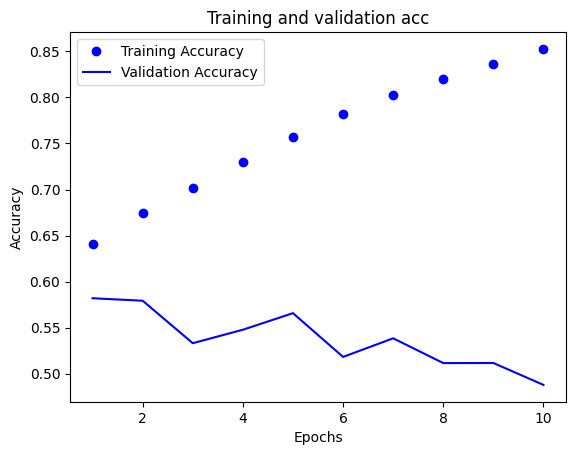

In [62]:
plot_train_val_acc(model.history)
